# Marketing Customer Segmentation Analysis
https://www.kaggle.com/datasets/jackdaoud/marketing-data/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn import decomposition

In [2]:
data = pd.read_csv(r"C:\Users\haley\OneDrive\Documents\GitHub Projects\Marketing Analysis\ifood_df.csv")
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


### 1. Data Cleaning and Preparation 

Learn more about the datatypes using .info()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

See if there are any missing values using .isna().

In [4]:
#check if there are any N/A's
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Learn more about the dataset by viewing how many unique values are in each column. Two columns only have 1 unique value. I removed them from the dataset because they will not contribute to the model.

    Z_CostContact              1
    Z_Revenue                  1
   
Use data.info() to verify the columns dropped.

In [5]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [6]:
col_names = ['Z_CostContact', 'Z_Revenue']
data.drop(col_names, inplace=True, axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

## 2. Data Exploration
a - check for outliers

b - check for correlated factors

c - add new column age buckets

d - add new binary column 0 if they did not purchase, 1 if they did purchase

**further investigation if there were significant factors that led to people making purchases sooner rather than later?? ex: older customers were more likely to purchase the last campaign than the first

Check the dataset for outliers. 

1 - The Box-Plot visually shows 2 values as an outlier. The lavender shaded section is the interquartile range (IQR) between Q1 and Q3. The crimson line within the IQR is the median of the MntTotal data. The royalblue caps are the min and max of the dataset.

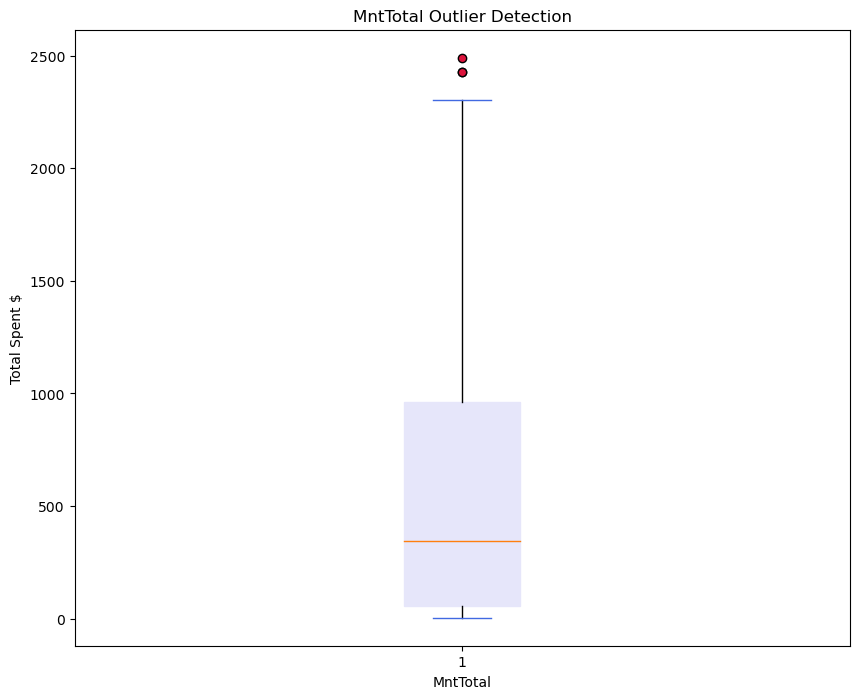

In [8]:
#create a figure and axis
fig1, ax = plt.subplots(figsize=(10,8))

#create a boxplot for the desired column with custom colors
boxplot = ax.boxplot(data['MntTotal'],
                     vert=True,  #vertical boxplot
                     patch_artist=True  #add colors
                    )

# Add the right color for each part of the box
plt.setp(boxplot['boxes'], color='lavender')
plt.setp(boxplot['whiskers'], color='black')
plt.setp(boxplot['caps'], color='royalblue')
plt.setp(boxplot['fliers'], markerfacecolor='crimson')

# Set labels and title
ax.set_xlabel('MntTotal')
ax.set_ylabel('Total Spent $')
ax.set_title('MntTotal Outlier Detection')

# Show the plot
plt.show()

Based on the boxplot, two data points fall outside the 3rd quantile. They could be removed but they are close to the top cap. Outliers should be removed if the data is incorrect or if the sample is not representative. In this case, I will keep the outliers in.

In [9]:
#turn these into data annotations
q1 = np.quantile(data['MntTotal'], 0.25)
med = np.median(data['MntTotal'])
q3 = np.quantile(data['MntTotal'], 0.75)

#finding interquartile region
iqr = q3-q1

#lower cap
lcap = q3+(1.5*iqr)

#upper cap
ucap = q1-(1.5*iqr)

print('Quantile 1:', q1,
      'Median:', med,
      'Quantile 3:', q3,
      'Lower Bound:', lcap,
      'Upper Bound:', ucap,  
      'IQR:', iqr
     )

Quantile 1: 56.0 Median: 343.0 Quantile 3: 964.0 Lower Bound: 2326.0 Upper Bound: -1306.0 IQR: 908.0


In [10]:
data['MntTotal'].describe()

count    2205.000000
mean      562.764626
std       575.936911
min         4.000000
25%        56.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: MntTotal, dtype: float64

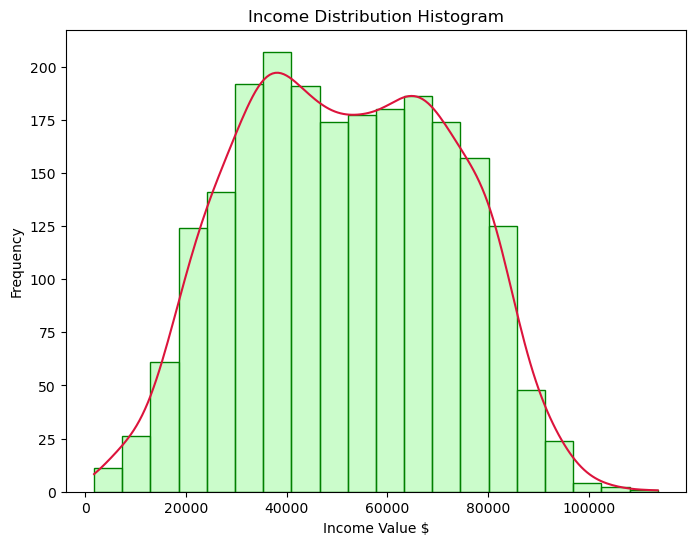

In [11]:
#income
plt.figure(figsize=(8,6))
inc = sns.histplot(data=data, x='Income', bins=20, color='palegreen', edgecolor='green', kde=True) #kde adds distribution 
inc.lines[0].set_color('crimson')
plt.title('Income Distribution Histogram')
plt.xlabel('Income Value $')
plt.ylabel('Frequency')
plt.show()

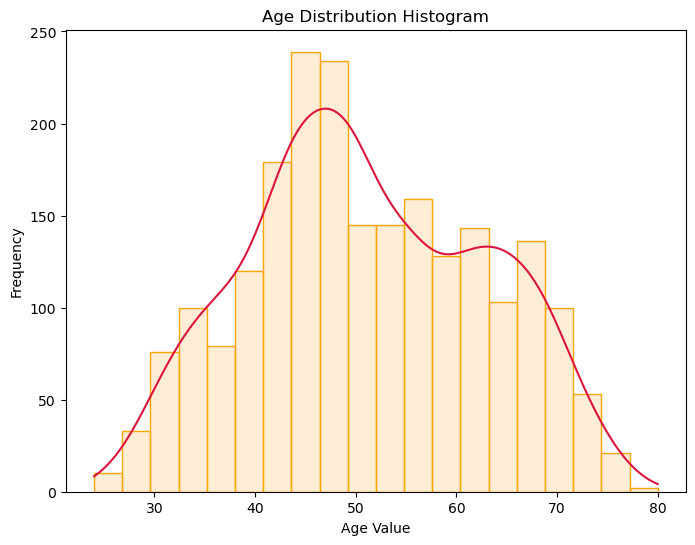

In [12]:
#income
plt.figure(figsize=(8,6))
inc = sns.histplot(data=data, x='Age', bins=20, color='navajowhite', edgecolor='orange', kde=True) #kde adds distribution 
inc.lines[0].set_color('crimson')
plt.title('Age Distribution Histogram')
plt.xlabel('Age Value')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

First, run the correlation matrix on all variables individually.

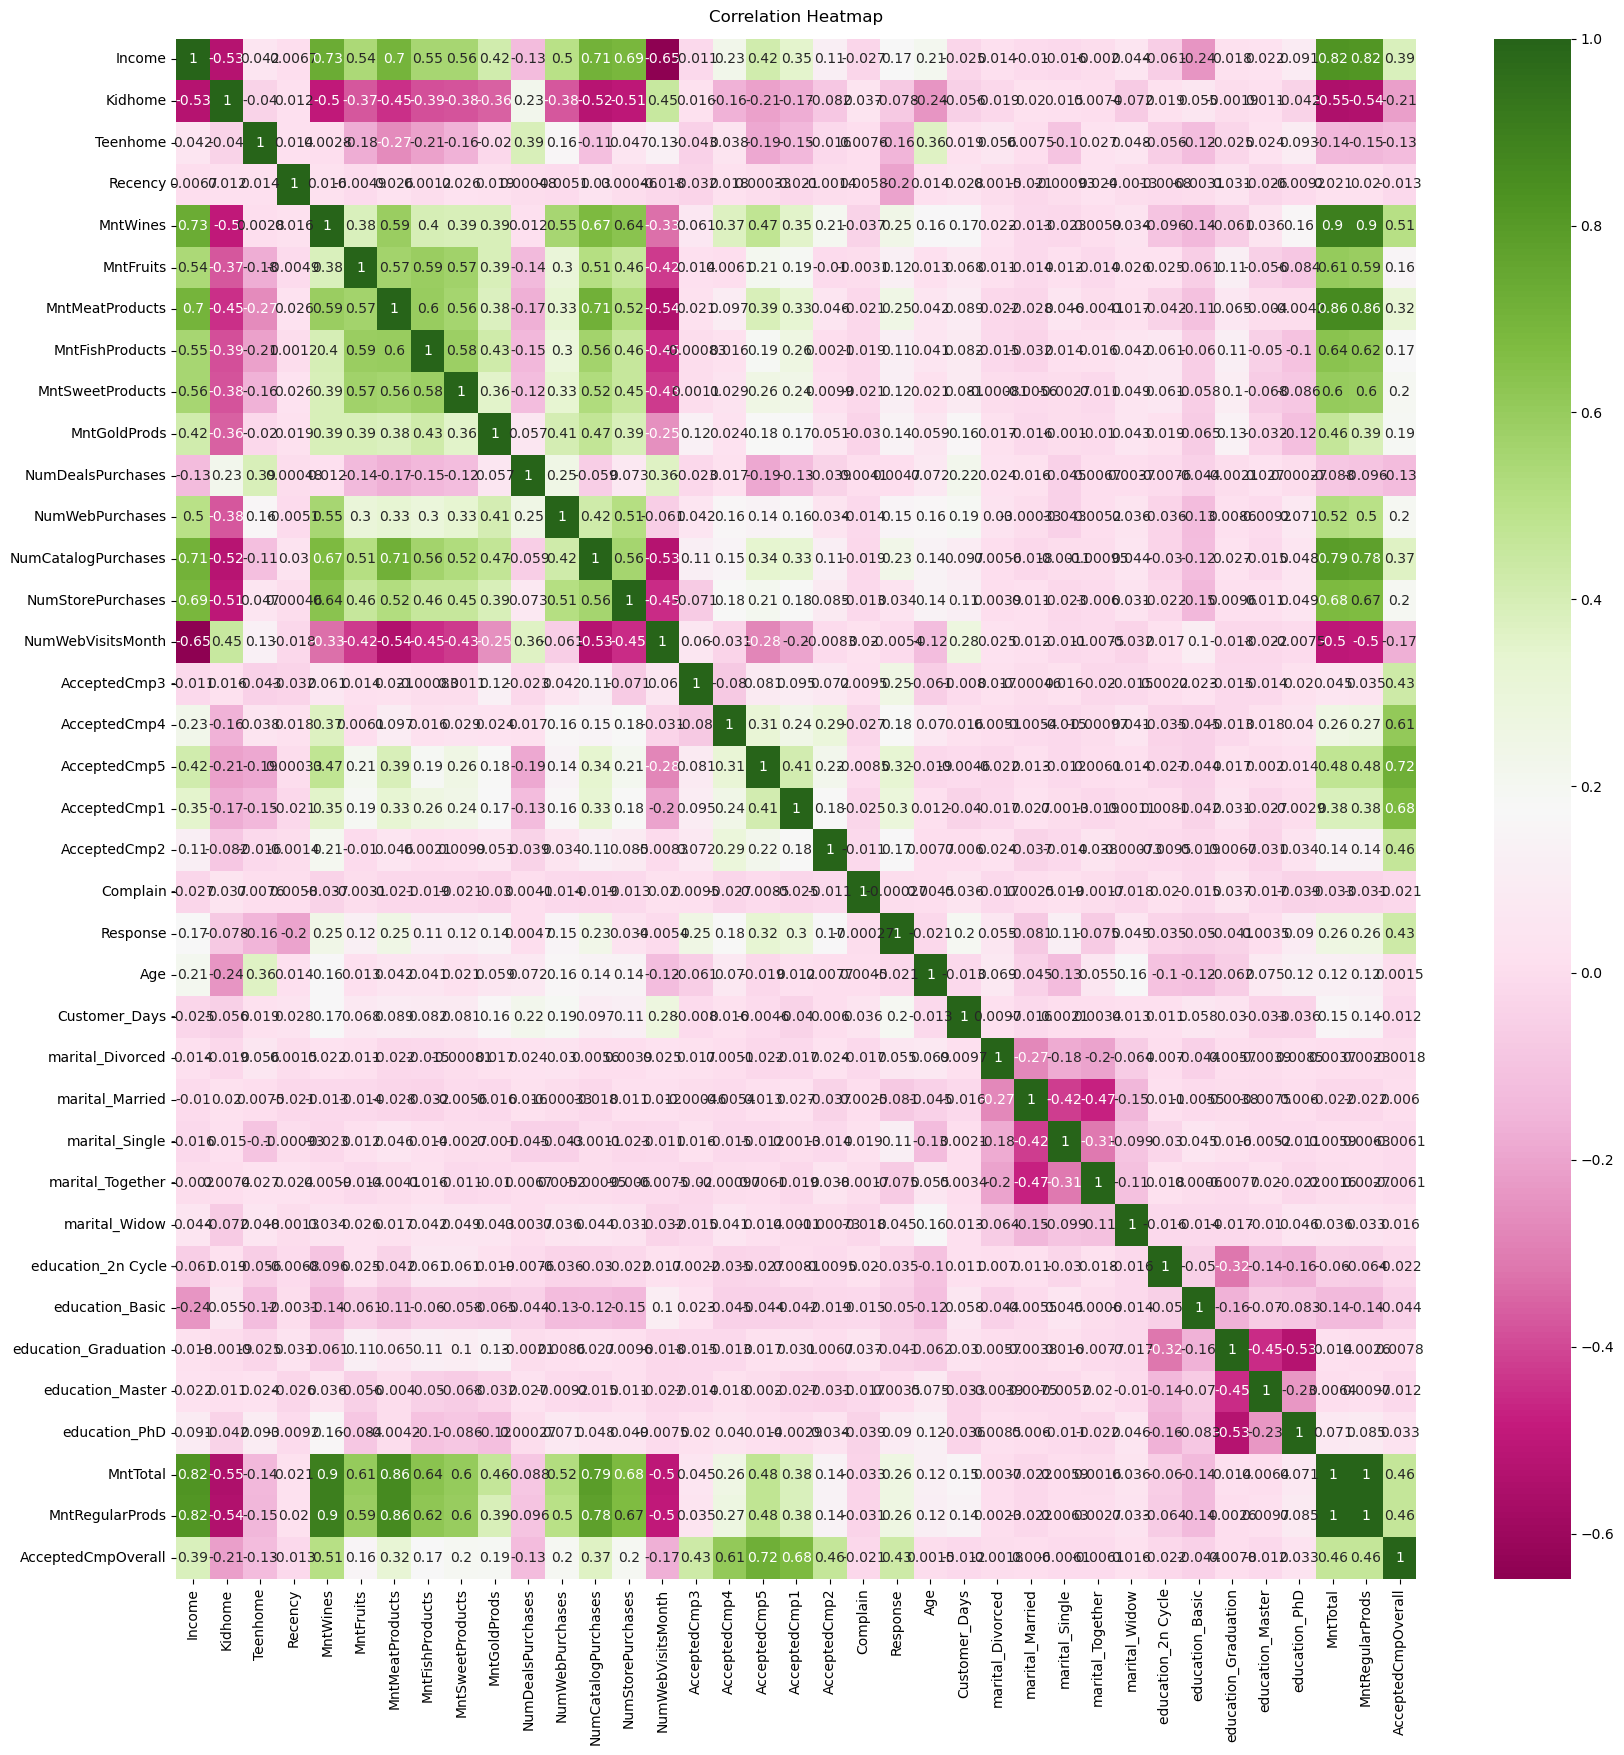

In [13]:
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='PiYG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

There are many like-variables. Create a new dataframe with like-variables as a single column.

In [14]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

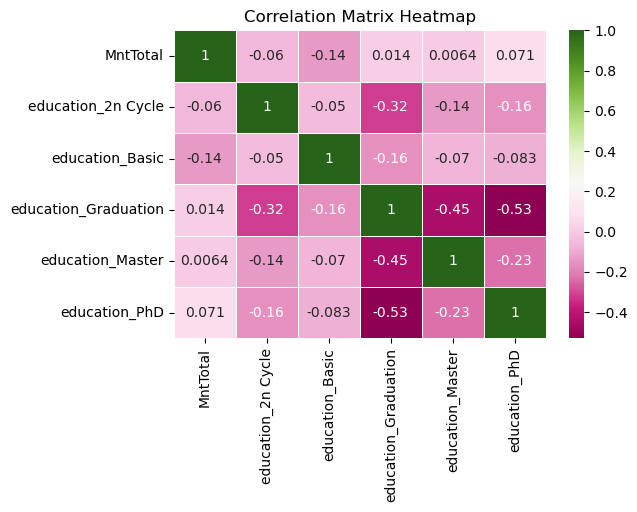

In [15]:
#change col to look at different groups of like-variables
corr_matrix = data[['MntTotal']+cols_education].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Measuring Variable's Correlation with MntTotal 

**Positive Correlation:**
MntRegularProds (1.00),
MntWines (0.90),
MntMeatProducts (0.86),
Income (0.82),
NumCatalogPurchases (0.79),
NumStorePurchases (0.68),
MntFishProdcuts (0.64),
MntFruits (0.61),
NumWebPurchases (0.52),
MntGoldProds (0.46),
All variables measure the amount spent on products and purchases have higher correlations with MntTotal as expected. They all impact the final MntTotal value.,
All campaign variables have a positive correlation with MntTotal.

**No Impact:**
Response (0.26),
Customer_Days (0.15),
Age (0.12),
Teenhome (-0.042),
Complain (-0.033),
All education and martial statuses have little impact,


**Negative Correlation:**
KidHome (-0.55),
NumWebVisitsMonth (-0.5)

### Feature Engineering
Create new features for Marital Status and Education.

In [16]:
def marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] ==1:
        return 'Single'
    elif row['marital_Together'] ==1:
        return 'Together'
    elif row['marital_Widow'] ==1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital_Status'] = data.apply(marital_status, axis=1)

In [17]:
def marital_binary(row):
    if row['Marital_Status'] == 'Widow':
        return '0'
    elif row['Marital_Status'] == 'Single':
        return '0'
    elif row['Marital_Status'] == 'Divorced':
        return '0'
    else:
        return 1
data['Marital_Binary'] = data.apply(marital_binary, axis=1)

Text(0, 0.5, 'Count')

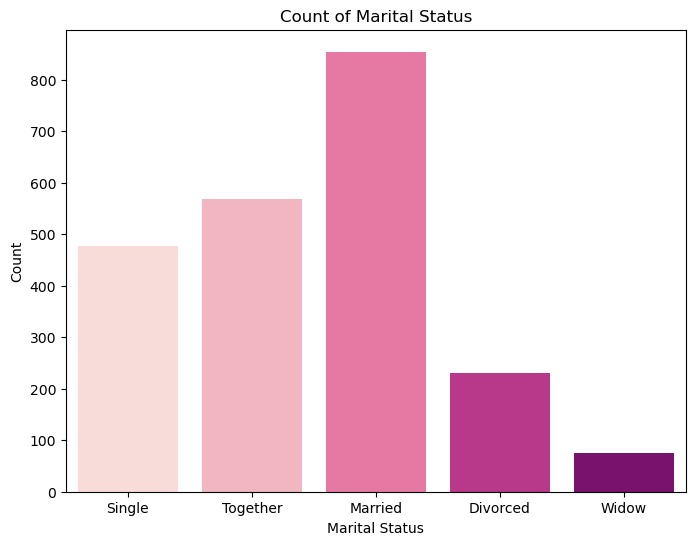

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_Status', data=data, palette='RdPu' )

plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [19]:
def education_status(row):
    if row['education_2n Cycle'] ==1:
        return '2n Cycle'
    elif row['education_Basic'] ==1:
        return 'Basic'
    elif row['education_Graduation'] ==1:
        return 'Graduation'
    elif row['education_Master'] ==1:
        return 'Master'
    elif row['education_PhD'] ==1:
        return 'PhD'
    else:
        return 'Unknown'
data['Education_Status'] = data.apply(education_status, axis=1)

In [20]:
def education_binary(row):
    if row['Education_Status'] == 'Graduation':
        return '1'
    elif row['Education_Status'] == 'Master':
        return '1'
    elif row['Education_Status'] == 'PhD':
        return '1'
    else:
        return 0
data['Education_Binary'] = data.apply(education_binary, axis=1)

Text(0, 0.5, 'Count')

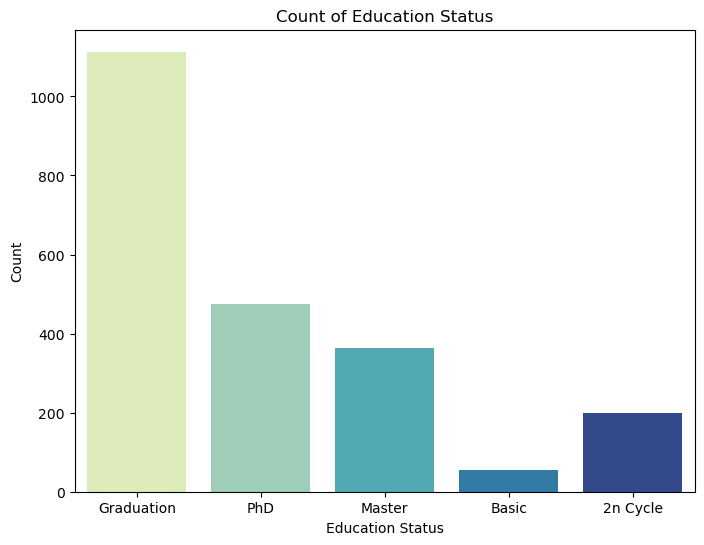

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='Education_Status', data=data, palette='YlGnBu' )

plt.title('Count of Education Status')
plt.xlabel('Education Status')
plt.ylabel('Count')

## 3. Investigate demographic factors of purchases
Create Training (80%) and Test Set (20%)

In [22]:
#cols = ['MntTotal', 'Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntRegularProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days']
cols = ['MntTotal', 'Income', 'Age', 'Marital_Binary', 'Education_Binary', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
x = data[cols]
y = data['AcceptedCmpOverall']
#y = data['MntTotal']

In [63]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2200    0
2201    1
2202    1
2203    0
2204    0
Name: AcceptedCmpOverall, Length: 2205, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
#training set -- 80%, 1764 rows
#test set -- 20%, 441 rows

### Scale the Data

Scale the data. Scaling the date changes the range of the data while maintaining the distribution. There are multiple types of scalers in sklearn. The StandardScaler() is the most appropriate scaler to use for this data because it is normally distributed, does not have negative values, and contains outliers.

**StandardScaler():** use for a normal distribution, most common; the standard scaler is a mean-based scaling method.
       
    Xnew = (Xi - Xmean) / Stdev

**fit_tranform():** is used to preprocess data for model training, the equivalent to using fit() and transform()

**fit():** calculates the various parameters

**transform():** applies the calculated parameters to standardize the data

**How is fit_tranform() used with a scaler()?**
Fit() calculates the mean and standard deviation (variance). Transform() turns all the features into scaled dataset while maintaining the mean and variation. The StandardScaler() works to 

In [25]:
#scale the x_train data
scaler = StandardScaler()
#take copy of datam, drop qualitative fields
x_train_copy = x_train.copy()
#scale the data
x_train_scaled=scaler.fit_transform(x_train_copy)
#x_test_scaled

x_test_copy = x_test.copy()
x_test_scaled=scaler.fit_transform(x_test_copy)
#x_train_scaled

### Perform Principal Component Analysis
Reduce the dimensions. PCA takes original features to create new features that capture the most variance in the data.

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
#pca = PCA(n_components = 3)  #2 n_components = dimensions
x_train_pca = pca.fit_transform(x)
x_test_pca = pca.fit_transform(x_test_scaled)

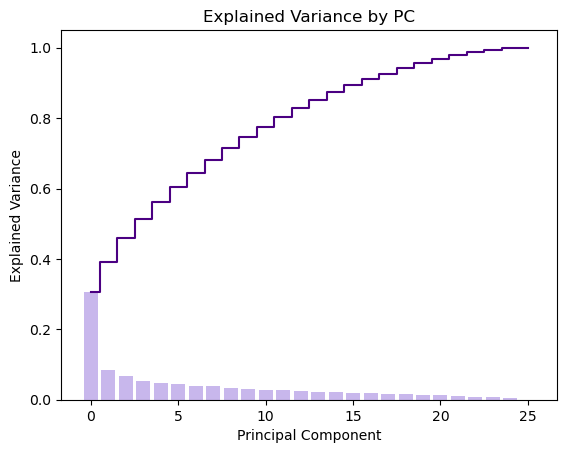

In [27]:
exp_var = pca.explained_variance_ratio_  #explained variance for each PC
cumsum_eigenvalues = np.cumsum(exp_var)  #the cumulative sum of explained variance for each PC in x_train_pca

#create a plot to visualize the PCs variance
#adding the bars
plt.bar(range(0, len(exp_var)), exp_var, alpha=0.5, align='center', color='mediumpurple',
        label='Individual PC Explained Variance')
#adding the 
plt.step(range(0, len(cumsum_eigenvalues)), cumsum_eigenvalues, where='mid', color='indigo',
        label='Cumulative Explained Variance')
plt.title('Explained Variance by PC')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.show()

Select the number of PCs that account for 80-90% of the variation within the model. 

In [28]:
print(pd.DataFrame(cumsum_eigenvalues))

           0
0   0.306047
1   0.390792
2   0.458355
3   0.512524
4   0.560410
5   0.604292
6   0.643714
7   0.681506
8   0.715987
9   0.747412
10  0.775440
11  0.803205
12  0.829193
13  0.851860
14  0.873004
15  0.892718
16  0.910664
17  0.926639
18  0.941937
19  0.955486
20  0.967489
21  0.978026
22  0.986765
23  0.994707
24  1.000000
25  1.000000


In [29]:
from sklearn.cluster import KMeans
Xx = x_train_pca 
inertia_list = []
for K in range(2,16):
    inertia = KMeans(n_clusters=K, random_state=7).fit(Xx).inertia_
    inertia_list.append(inertia)

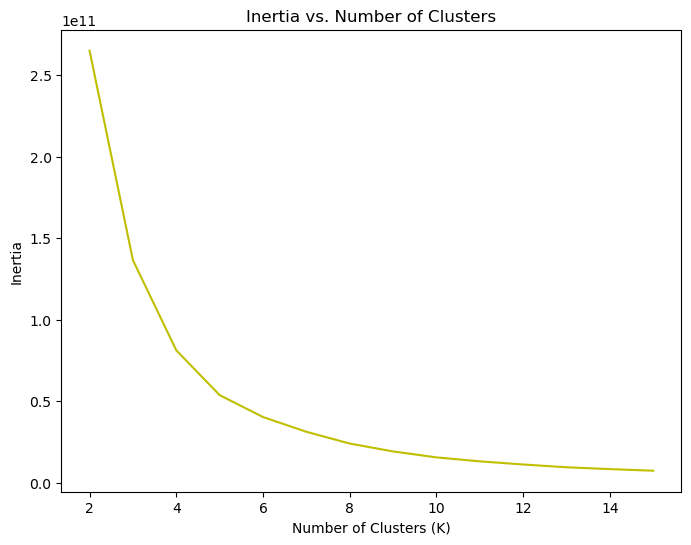

In [30]:
plt.figure(figsize=[8,6])
plt.plot(range(2,16), inertia_list, color='y')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

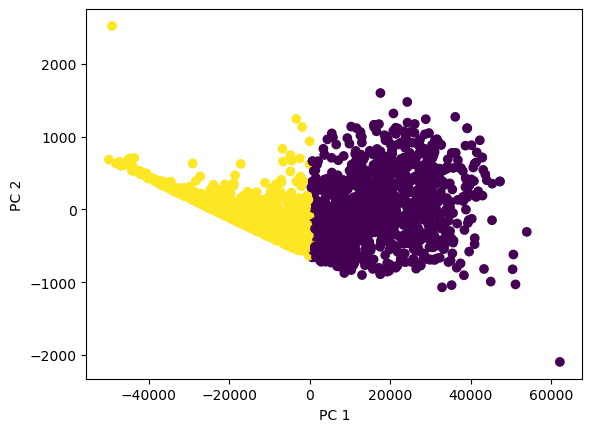

In [31]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_train_pca)

pred = kmeans.predict(x_train_pca)

plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=pred, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [32]:
#add number of cluster 0, 1 as a column
x['Cluster'] = pred
#see new cluster added
#x.head()

C:\Users\haley\AppData\Local\Temp\ipykernel_9680\3756571613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster'] = pred


### Confusion Matrix 

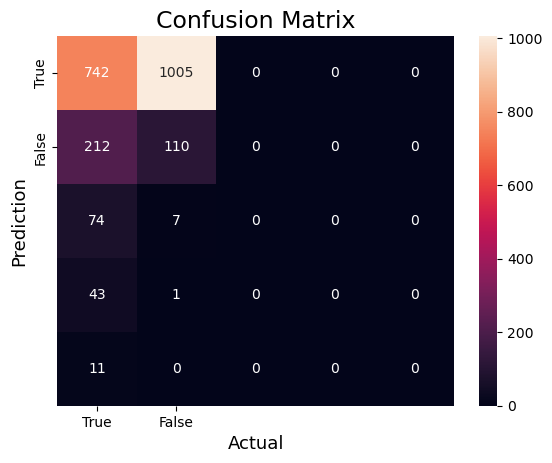

In [66]:
from sklearn.metrics import confusion_matrix
y_true = y
y_pred = x['Cluster']
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['True','False'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Based on this, 852 were predicted correctly and 212 were preducted incorrectly. There is opportunity to select a new predictor that could allow for more distinct clustering.

## 4. Additional EDA and Insights

In [47]:
MntCols_x = x[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
Campaign_x = x[['Cluster','AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']]
Marital_x = x[['Cluster', 'Marital_Binary']]
Education_x = x[['Cluster', 'Education_Binary']]

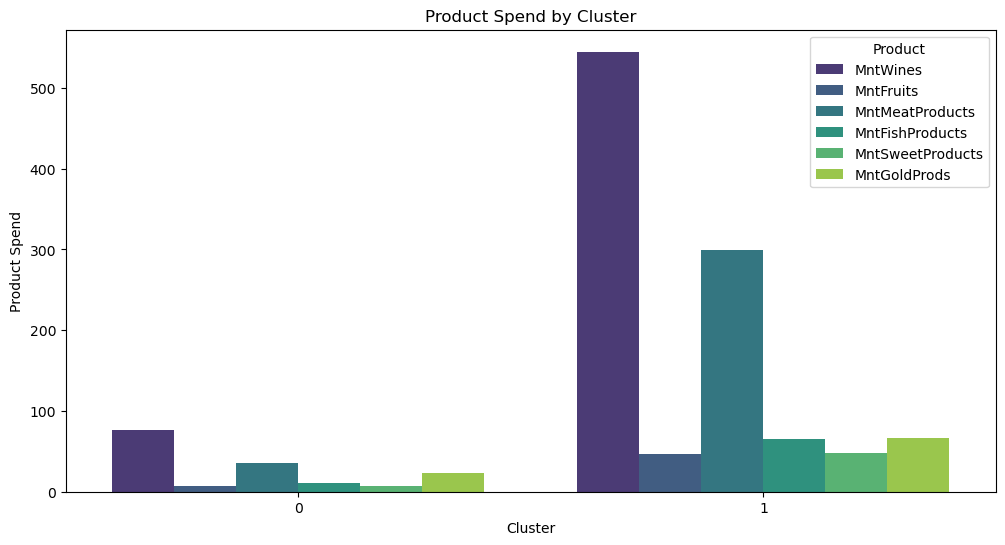

In [70]:
#plotting the product spend per cluster
melted_data = pd.melt(MntCols_x , id_vars="Cluster", var_name="Product", value_name="$ Spend")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="$ Spend", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Spend by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Spend")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Text(0, 0.5, 'Income')

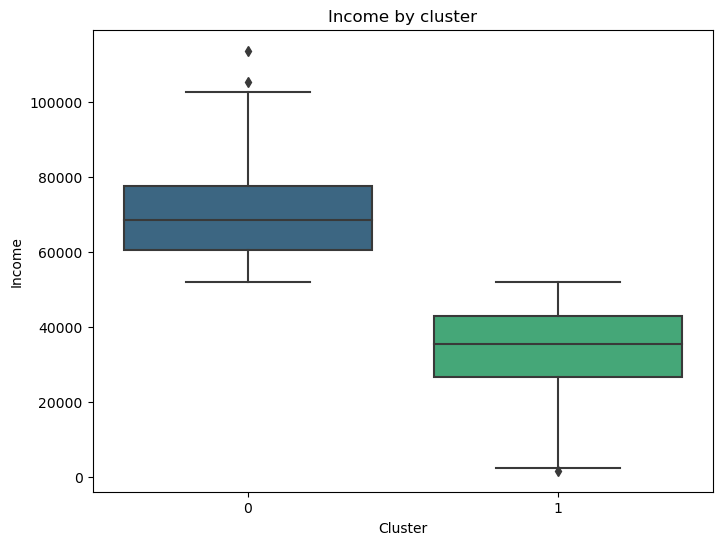

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=x, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

Text(0, 0.5, 'Count of Customer Marital Status')

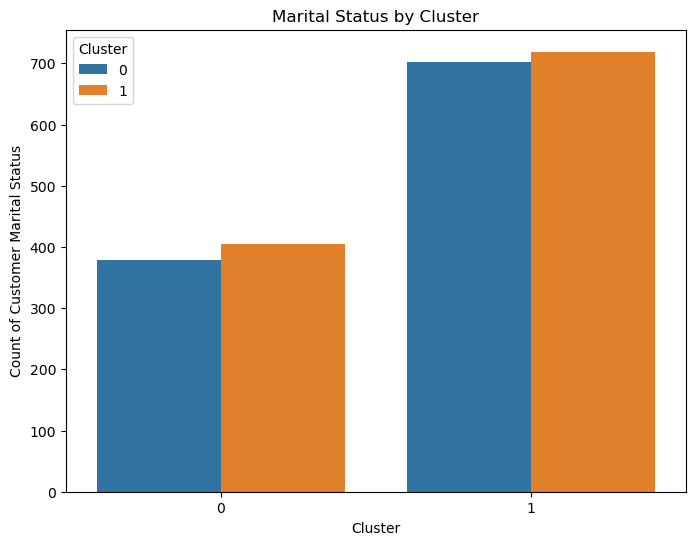

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x ='Marital_Binary', hue = "Cluster", data = Marital_x)
plt.title('Marital Status by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Customer Marital Status')

Text(0, 0.5, 'Count of Customer Education Status')

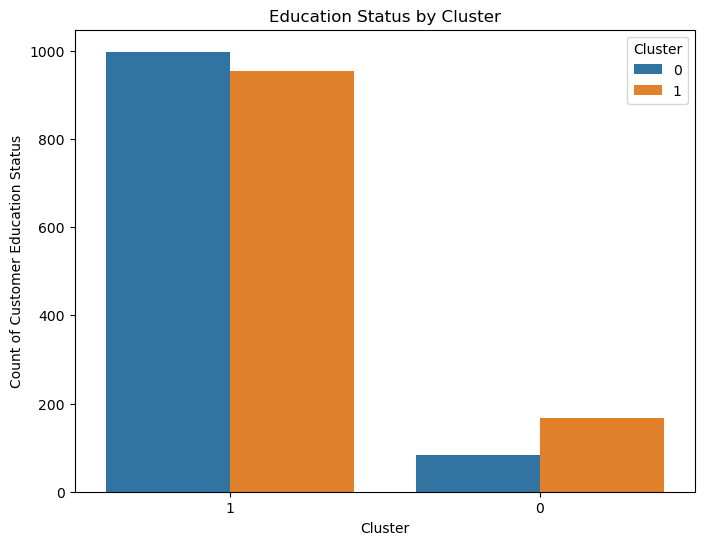

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(x ='Education_Binary', hue = "Cluster", data = Education_x)
plt.title('Education Status by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Customer Education Status')

### Insight 1:
Customers that respond to campaigns purchase significantly more wine and meat products than customers that do not respond to the campaign.
### Insight 2:
Customers with lower incomes (between $25,000 - $42,000 annually) are more likely to respond to the campaign and make a purchase. There is potential run multiple campaigns to effectively target the lower and higher income groups.
### Insight 3:
Members that have been married are more likely to respond to a campaign than single members.

### Insight 4:
Members with higher than basic education are more likely to respond to a campaign. There is potential to investigate the group that did not respond more closely. I assume customers with a basic education is more likely to be low income. However, low income and basic educated groups does not follow the same trend.

## 5. K-Nearest Neighbors (just for fun)

Use a for loop to determine the lowest K value with the highest r-squared value. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knum = [2, 3, 4, 5]
r2_values = {}

for k in knum:
    knn_classifier = KNeighborsClassifier(n_neighbors=2)
    knn_classifier.fit(x_train_scaled, y_train)
    pred = knn_classifier.predict(x_test_scaled)
    r_squared = metrics.r2_score(y_test, pred)
    r2_values[k] = r_squared

for k, r2 in r2_values.items():
    print(f"R-squared for k={k}: {r2:.5f}")

Build the model off k=2

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn_classifier.fit(x_train_scaled, y_train)
pred = knn_classifier.predict(x_test_scaled)

Graph the KNN

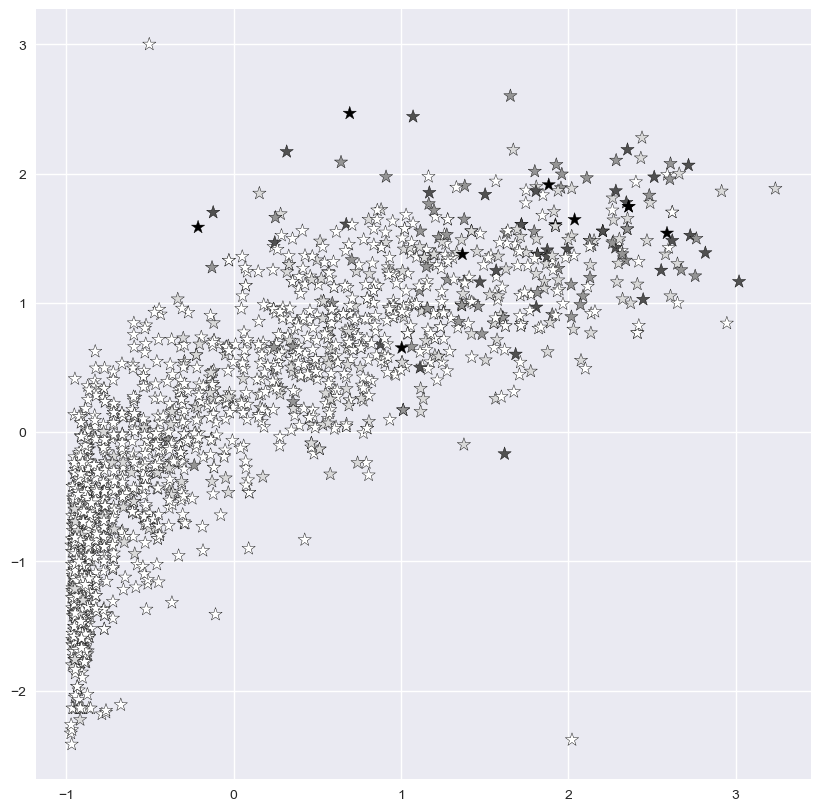

In [67]:
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(x_train_scaled[:,0], x_train_scaled[:,1], c=y_train,
           marker='*', s=100, edgecolors='black')
plt.show()